# Povezava do vira podatkovne zbirke: https://podatki.gov.si/dataset/surs0727802s

## POVPREČNO MESEČNO ŠTEVILO PLAČANIH IN OPRAVLJENIH DELOVNIH UR NA ZAPOSLENO OSEBO PO DEJAVNOSTIH

In [96]:
import warnings
warnings.simplefilter("ignore", category = FutureWarning)

# Uvozimo vse potrebne knjižnice
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo šumnike nadomestili s sprejemljivimi inačicami (Š - S, Č - C, Ž - Z)

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
delovne_ure = pd.read_csv("../../podatki/delovne_ure/delovne_ure.csv", sep = ";")

# Pretvorimo imena stolpcev v velike črke
delovne_ure.columns = delovne_ure.columns.str.upper()

# Pretvorimo vrstice v velike črke
delovne_ure['URE'] = delovne_ure['URE'].apply(lambda x: x.upper())

# Izberemo 5 najbljižjih sosedov
imputer = KNNImputer(n_neighbors=5)

# Nad vsakim stolpec uporabimo KNNImputer, da nadomestimo manjkajoče vrednosti z napovedjo
delovne_ure.iloc[:, 2:] = imputer.fit_transform(delovne_ure.iloc[:, 2:])

# Prva dva stolpca pretvorimo v 'STRING'
delovne_ure.iloc[:, 0:2] = delovne_ure.iloc[:, 0:2].astype(str)
# Preostale stolpce pretvorimo v 'INTEGER'
delovne_ure.iloc[:, 2:] = delovne_ure.iloc[:, 2:].astype(int)

opravljene_delovne_ure = delovne_ure.loc[delovne_ure['URE'] == 'OPRAVLJENE DELOVNE URE'].copy()
placane_ure = delovne_ure.loc[delovne_ure['URE'] == 'PLACANE URE'].copy()


df = opravljene_delovne_ure
df['LETO'] = df['CETRTLETJE'].str[:4]
columns_to_agg = df.columns[2:]
opravljene_delovne_ure_grouped = df.groupby('LETO').agg({col: 'mean' for col in columns_to_agg if col != 'LETO'})

df = placane_ure
df['LETO'] = df['CETRTLETJE'].str[:4]
columns_to_agg = df.columns[2:]
placane_delovne_ure_grouped = df.groupby('LETO').agg({col: 'mean' for col in columns_to_agg if col != 'LETO'})

In [97]:
# Shranimo v .xlsx datoteko
delovne_ure.to_excel('delovne_ure.xlsx', index=False)

In [98]:
# Pregled vseh stolpcev
opravljene_delovne_ure_grouped

,SKD DEJAVNOST - SKUPAJ,"A KMETIJSTVO IN LOV, GOZDARSTVO, RIBISTVO",B RUDARSTVO,C PREDELOVALNE DEJAVNOSTI,"D OSKRBA Z ELEKTRICNO ENERGIJO, PLINOM IN PARO","E OSKRBA Z VODO, RAVNANJE Z ODPLAKAMI IN ODPADKI, SANIRANJE OKOLJA",F GRADBENISTVO,"G TRGOVINA, VZDRZEVANJE IN POPRAVILA MOTORNIH VOZIL",H PROMET IN SKLADISCENJE,I GOSTINSTVO,J INFORMACIJSKE IN KOMUNIKACIJSKE DEJAVNOSTI,K FINANCNE IN ZAVAROVALNISKE DEJAVNOSTI,L POSLOVANJE Z NEPREMICNINAMI,"M STROKOVNE, ZNANSTVENE IN TEHNICNE DEJAVNOSTI",N DRUGE RAZNOVRSTNE POSLOVNE DEJAVNOSTI,"O DEJAVNOST JAVNE UPRAVE IN OBRAMBE, DEJAVNOST OBVEZNE SOCIALNE VARNOSTI",P IZOBRAZEVANJE,Q ZDRAVSTVO IN SOCIALNO VARSTVO,"R KULTURNE, RAZVEDRILNE IN REKREACIJSKE DEJAVNOSTI",S DRUGE DEJAVNOSTI
LETO,,,,,,,,,,,,,,,,,,,,
2008,134.00,133.50,133.75,134.00,135.00,135.00,136.50,134.50,136.00,128.50,135.25,133.00,134.50,135.25,131.00,132.25,127.75,141.75,135.25,124.75
2009,135.00,135.00,129.75,132.25,134.00,139.25,138.50,135.25,136.75,129.75,138.25,137.25,135.25,143.25,133.75,134.50,130.00,142.25,135.50,126.25
2010,136.25,139.75,128.75,136.50,134.50,137.25,140.25,137.00,140.25,130.75,138.00,137.75,136.00,139.00,134.50,133.25,130.50,139.50,135.00,129.00
2011,135.25,137.75,130.00,135.00,133.00,136.25,139.75,134.75,138.25,128.50,137.00,135.75,135.00,138.25,133.75,135.75,129.75,138.50,132.25,127.25
2012,133.25,130.50,131.00,134.00,132.50,132.00,139.00,134.25,135.75,129.00,137.25,128.75,134.50,134.25,132.00,128.00,127.50,136.50,130.75,136.50
2013,135.00,131.50,130.00,135.25,135.50,137.50,140.75,133.75,139.50,129.75,137.00,131.50,135.00,140.25,133.25,129.25,131.25,136.00,130.00,135.50
2014,136.00,132.50,130.25,136.25,133.75,136.00,142.00,135.75,140.00,129.50,136.50,131.25,136.25,139.25,134.25,131.75,132.50,142.50,132.50,136.25
2015,137.00,133.75,132.50,137.75,137.00,136.00,143.75,136.25,138.75,130.25,139.25,131.75,137.75,136.50,133.75,134.75,135.50,142.00,134.25,137.00
2016,133.75,130.25,127.00,135.50,136.00,135.25,132.75,132.25,133.25,132.25,134.75,130.25,131.25,133.00,132.00,132.25,130.50,141.50,129.75,130.50


In [99]:
placane_delovne_ure_grouped

,SKD DEJAVNOST - SKUPAJ,"A KMETIJSTVO IN LOV, GOZDARSTVO, RIBISTVO",B RUDARSTVO,C PREDELOVALNE DEJAVNOSTI,"D OSKRBA Z ELEKTRICNO ENERGIJO, PLINOM IN PARO","E OSKRBA Z VODO, RAVNANJE Z ODPLAKAMI IN ODPADKI, SANIRANJE OKOLJA",F GRADBENISTVO,"G TRGOVINA, VZDRZEVANJE IN POPRAVILA MOTORNIH VOZIL",H PROMET IN SKLADISCENJE,I GOSTINSTVO,J INFORMACIJSKE IN KOMUNIKACIJSKE DEJAVNOSTI,K FINANCNE IN ZAVAROVALNISKE DEJAVNOSTI,L POSLOVANJE Z NEPREMICNINAMI,"M STROKOVNE, ZNANSTVENE IN TEHNICNE DEJAVNOSTI",N DRUGE RAZNOVRSTNE POSLOVNE DEJAVNOSTI,"O DEJAVNOST JAVNE UPRAVE IN OBRAMBE, DEJAVNOST OBVEZNE SOCIALNE VARNOSTI",P IZOBRAZEVANJE,Q ZDRAVSTVO IN SOCIALNO VARSTVO,"R KULTURNE, RAZVEDRILNE IN REKREACIJSKE DEJAVNOSTI",S DRUGE DEJAVNOSTI
LETO,,,,,,,,,,,,,,,,,,,,
2008,169.50,170.50,174.25,171.25,177.00,173.75,169.00,168.25,172.50,163.25,170.50,167.25,167.50,168.50,164.75,169.50,165.75,176.00,166.25,159.75
2009,167.50,169.75,170.75,166.00,172.25,172.00,168.00,167.25,170.25,162.25,169.75,167.00,166.50,168.00,164.25,169.00,165.50,174.00,166.00,158.50
2010,168.25,171.75,169.00,169.25,171.75,171.75,168.50,167.25,173.50,163.00,169.50,167.50,166.00,167.75,163.75,168.75,165.50,173.25,166.25,160.50
2011,168.00,171.50,170.00,169.50,171.00,170.50,168.00,167.00,173.25,161.75,168.75,166.75,166.25,166.50,164.25,168.00,164.75,172.50,165.50,160.25
2012,168.25,167.25,173.75,170.50,172.00,171.75,168.25,167.00,170.75,158.50,169.25,166.75,166.00,165.75,163.25,168.25,165.00,172.75,166.00,168.25
2013,168.00,166.75,172.00,170.50,172.00,171.25,168.00,166.50,171.25,158.75,168.75,166.50,165.25,165.25,163.00,169.75,165.00,172.25,166.00,168.00
2014,168.25,166.50,170.50,170.50,172.00,171.25,168.25,166.25,171.00,157.00,168.00,166.00,165.50,165.00,162.50,170.50,166.50,175.25,166.25,167.00
2015,168.00,166.50,170.25,170.25,171.75,171.50,168.50,165.50,171.25,156.00,168.75,165.50,164.75,164.25,161.25,170.50,166.25,175.25,165.25,166.25
2016,167.00,164.50,166.75,169.50,171.50,171.50,164.50,164.50,165.25,163.50,168.50,165.75,163.75,161.75,161.75,171.00,166.50,174.50,164.50,161.25


---

In [100]:
df = opravljene_delovne_ure_grouped
df_selected = df.iloc[:, 0:]

fig = px.imshow(df_selected.iloc[:, 1:].transpose(), x=df_selected.index, y=df_selected.columns[1:],
                color_continuous_scale='viridis', title='Opravljene delovne ure',
                labels={'x': 'Leto', 'y': 'Kategorija'}, width=1200, height=800)
fig.update_layout(yaxis_autorange='reversed')
fig.show()



In [101]:
df = placane_delovne_ure_grouped
df_selected = df.iloc[:, 0:]

fig = px.imshow(df_selected.iloc[:, 1:].transpose(), x=df_selected.index, y=df_selected.columns[1:],
                color_continuous_scale='viridis', title='Plačane delovne ure',
                labels={'x': 'Leto', 'y': 'Kategorija'}, width=1200, height=800)
fig.update_layout(yaxis_autorange='reversed')
fig.show()



In [102]:
df = placane_delovne_ure_grouped.subtract(opravljene_delovne_ure_grouped)
df_selected = df.iloc[:, 0:]

fig = px.imshow(df_selected.iloc[:, 1:].transpose(), x=df_selected.index, y=df_selected.columns[1:],
                color_continuous_scale='viridis', title='Razlika med plačanimi urami in opravljenimi delovnimi urami',
                labels={'x': 'Leto', 'y': 'Kategorija'}, width=1200, height=800)
fig.update_layout(yaxis_autorange='reversed')
fig.show()



In [103]:
df = placane_delovne_ure_grouped.subtract(opravljene_delovne_ure_grouped)
traces = []
for column in df.columns[1:]:
    trace = go.Scatter(
        x=df.index,
        y=df[column],
        mode='lines',
        name=column
    )
    traces.append(trace)

layout = go.Layout(
    title='Razlika med plačanimi urami in opravljenimi delovnimi urami',
    xaxis=dict(title='Leto'),
    yaxis=dict(title='Število ur')
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [104]:
for column in df.columns[1:]:
    trace = go.Scatter(
        x=df.index,
        y=df[column],
        mode='markers',
        name=column
    )
    traces.append(trace)

layout = go.Layout(
    title='Razlika med plačanimi urami in opravljenimi delovnimi urami',
    xaxis=dict(title='Leta'),
    yaxis=dict(title='Število ur')
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

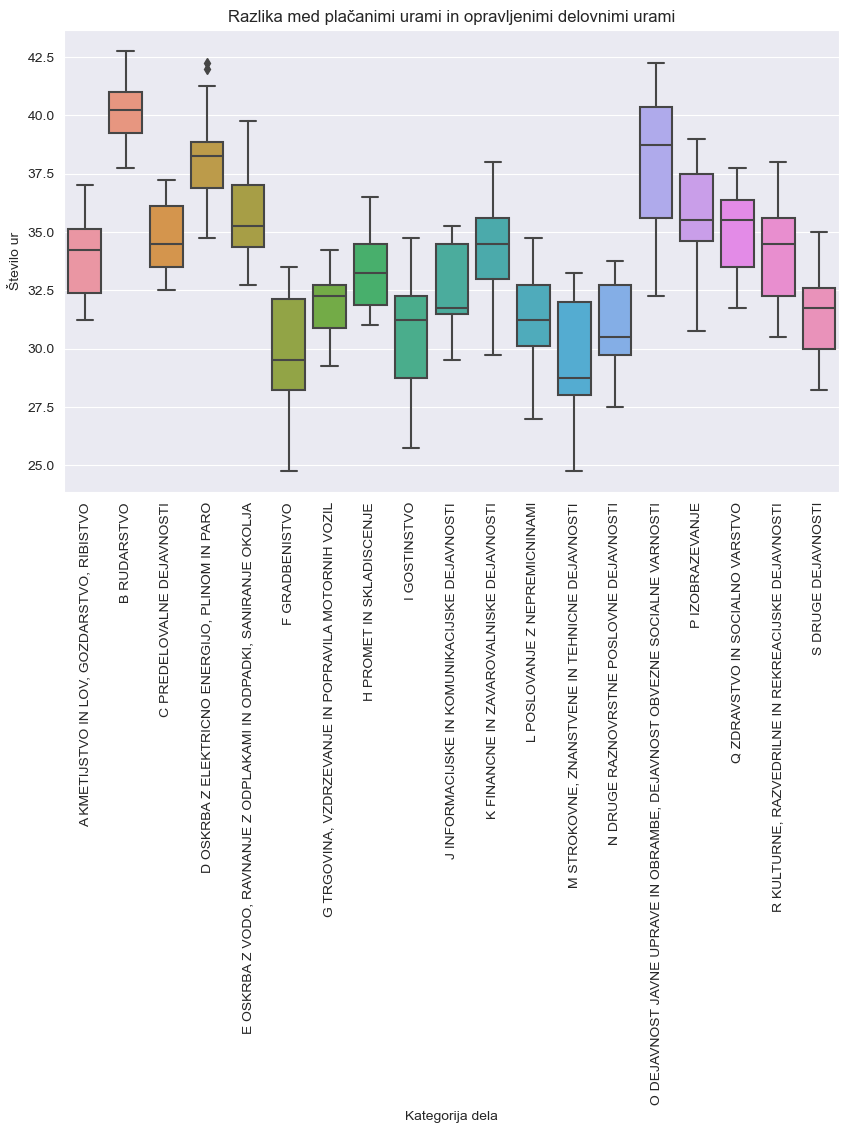

In [108]:
df = placane_delovne_ure_grouped.subtract(opravljene_delovne_ure_grouped)
df_selected = df.iloc[:, 0:]
df_selected.columns = ['Leto'] + list(df_selected.columns[1:])
df_combined = df_selected.iloc[:, 1:]

plt.figure(figsize=(10, 6))

sns.boxplot(data=df_combined)

plt.xlabel('Kategorija dela')
plt.xticks(rotation='vertical')
plt.ylabel('Število ur')
plt.title('Razlika med plačanimi urami in opravljenimi delovnimi urami')

plt.show()